# Part 1: EDA

### Part 1.1: Raw Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import imblearn
# will show all the columns
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('Churn_Modelling.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
print ("Num of rows: " + str(churn_df.shape[0])) # row count
print ("Num of columns: " + str(churn_df.shape[1])) # col count

Num of rows: 10000
Num of columns: 14


### Part 1.2 Data Cleaning

In [4]:
# Remove the heading and trailing whitespaces
churn_df['Geography'] = churn_df['Geography'].map(lambda x: x.strip())

In [5]:
# Drop some useless columns
to_drop = ['RowNumber','CustomerId','Surname']
churn_df = churn_df.drop(to_drop, axis=1)

### Part 1.3 Feature Exploration

In [6]:
churn_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Get unique count for each variable
churn_df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [8]:
# Preview 'Exited' column
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Part 1.4: Visualization

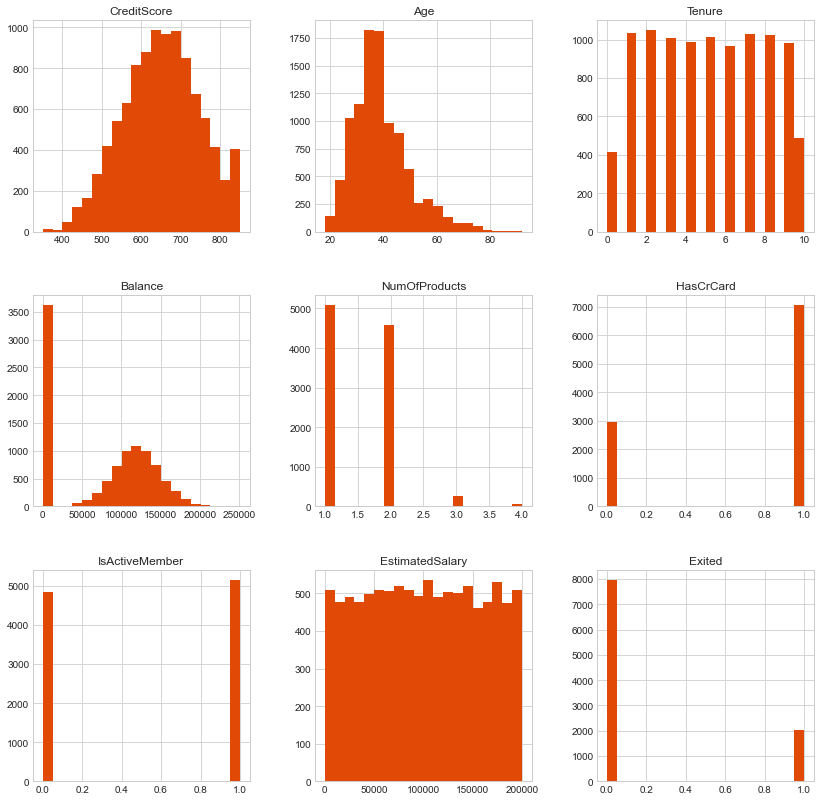

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
churn_df.hist(bins = 20, figsize = (14,14), color='#E14906')
plt.show()

Analysis of exit and gender:

In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

l_labels = ['Not Exited','Exited']
r_labels = ['Not Exited','Exited']
fig = make_subplots(rows = 1,
                   cols = 2,
                   specs = [[{'type' : 'domain'}, {'type' : 'domain'}]])
fig.add_trace(go.Pie(labels = l_labels,
                     values = churn_df[churn_df['Gender']=='Male']['Exited'].value_counts(),
                     name = 'Exited'),
              1, 1)
fig.add_trace(go.Pie(labels = r_labels,
                     values = churn_df[churn_df['Gender']=='Female']['Exited'].value_counts(),
                     name = 'Exited'),
             1, 2)

fig.update_traces(hole = .4, 
                  hoverinfo = "label+percent+name",
                  textfont_size = 16)

fig.update_layout(title_text = 'Gender and Exited Distributions',
                  annotations = [dict(text = 'Male',
                                      x = 0.16,
                                      y = 0.5,
                                      font_size = 20,
                                      showarrow = False),
                                dict(text = 'Female',
                                     x = 0.84,
                                     y = 0.5,
                                     font_size = 20,
                                    showarrow = False)])
fig.show()


Gender has great influence on the exited distribution. The exited propotion of male is 16.5%, lower than the female(25.1%).

Analysis of exit and age:

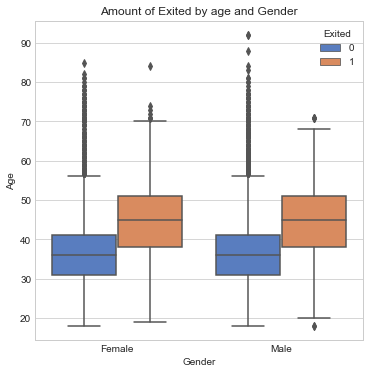

In [21]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(3,3,1)

g = sns.boxplot(x = "Gender",
                y = "Age", 
                hue = "Exited",
                data = churn_df,
                palette = "muted",
                ax = ax)

g.set_title("Amount of Exited by age and Gender")
plt.show()

Analysis of exit and geograph:

In [24]:
churn_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [39]:
l_labels = ['Not Exited','Exited']
r_labels = ['Not Exited','Exited']
fig = make_subplots(rows = 1,
                   cols = 3,
                   specs = [[{'type' : 'domain'}, {'type' : 'domain'},{'type' : 'domain'}]])
fig.add_trace(go.Pie(labels = l_labels,
                     values = churn_df[churn_df['Geography']=='Germany']['Exited'].value_counts(),
                     name = 'Exited'),
              1, 1)
fig.add_trace(go.Pie(labels = r_labels,
                     values = churn_df[churn_df['Geography']=='France']['Exited'].value_counts(),
                     name = 'Exited'),
             1, 2)
fig.add_trace(go.Pie(labels = r_labels,
                     values = churn_df[churn_df['Geography']=='Spain']['Exited'].value_counts(),
                     name = 'Exited'),
             1, 3)
fig.update_traces(hole = .4, 
                  hoverinfo = "label+percent+name",
                  textfont_size = 16)

fig.update_layout(title_text = 'Geography and Exited Distributions',
                  annotations = [dict(text = 'Germany',
                                      x = 0.08,
                                      y = 0.5,
                                      font_size = 20,
                                      showarrow = False),
                                dict(text = 'France',
                                     x = 0.5,
                                     y = 0.5,
                                     font_size = 20,
                                    showarrow = False),
                                dict(text = 'Spain',
                                     x = 0.9,
                                     y = 0.5,
                                     font_size = 20,
                                    showarrow = False)])
fig.show()


The geography has great influence on the exited distrition. The exited propotion of Germany is 32.4%, which is much higher than other two contries'. 

Check the correlation between features:

<AxesSubplot:>

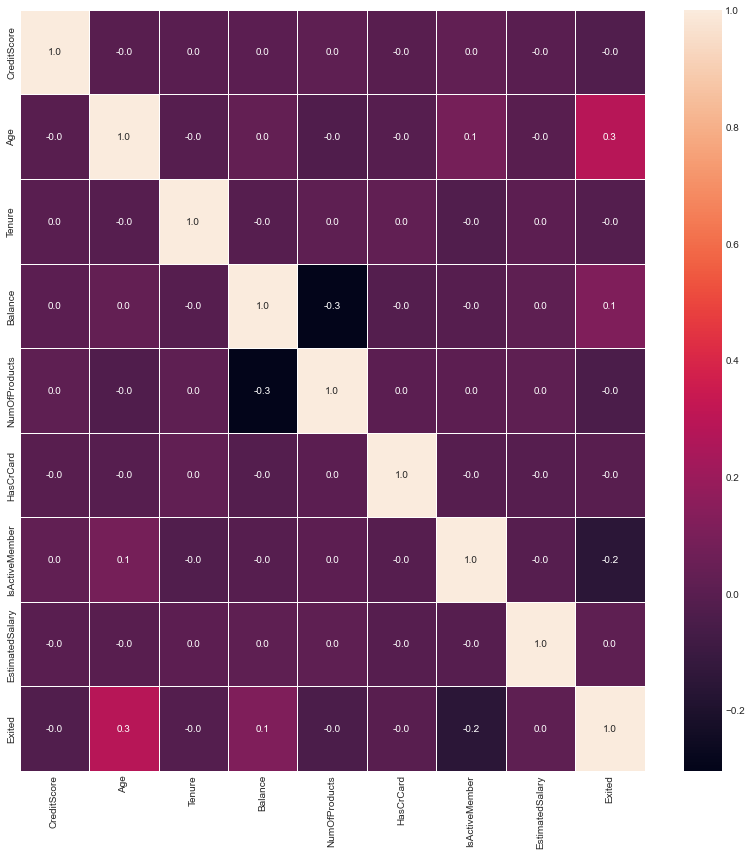

In [40]:
f, ax = plt.subplots(figsize = (14,14))
sns.heatmap(churn_df.corr(),
            annot = True, 
            linewidths = .5, 
            fmt = '.1f',
            ax = ax)

# Part 2: Feature Preprocessing

In [45]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [46]:
churn_df = churn_df.apply(lambda x: object_to_int(x))
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [47]:
plt.figure(figsize=(14,7))
churn_df.corr()['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [48]:
X = churn_df.drop(columns = ['Exited'])
y = churn_df['Exited'].values

# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [49]:
# Splite data into training and testing
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .2,random_state = 68)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 8000 observation with 10 features
test data has 2000 observation with 10 features


In [50]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Part 3.2: Model Training and Selection


In [51]:
#build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [52]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [53]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8055

In [55]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.809
Model accuracy of KNN is: 0.829
Model accuracy of Random Forest is: 0.860
